<a href="https://colab.research.google.com/github/jojoroy/Learning/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree
 This notebook will take a look how decision tree classifiers work with different interactions between features.

https://www.datacamp.com/tutorial/decision-tree-classification-python

In [2]:
import pandas as pd
import numpy as np
import random

In [8]:
num_samples = 500
random.seed(12)
# Generate random features
feature_1 = np.random.normal(0, 1, num_samples)  # Normally distributed feature
feature_2 = np.random.uniform(0, 10, num_samples)  # Uniformly distributed feature
feature_3 = np.random.randint(0, 100, num_samples)  # Integer feature
feature_4 = np.random.normal(0, 1, num_samples)
feature_5 = np.random.normal(0, 1, num_samples)
feature_6 = np.random.normal(0, 1, num_samples)
feature_7 = np.random.normal(0, 1, num_samples)
# Generate binary labels (0 or 1)
# Example: Labels based on a condition
labels = (feature_1 + feature_2 > 5).astype(int)  # Label is 1 if the sum of feature_1 and feature_2 > 5
labels2= (feature_1 + feature_2 + feature_4 + feature_6 > 6).astype(int)
# Create the DataFrame
df = pd.DataFrame({
    'Feature_1': feature_1,
    'Feature_2': feature_2,
    'Feature_3': feature_3,
    'Feature_4': feature_4,
    'Feature_5': feature_5,
    'Feature_6': feature_6,
    'Feature_7': feature_7,
    'Label': labels,
    'Label1': labels2
})

print(df.head())

   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0  -2.260114   2.546339         32   1.106984  -0.231644   0.188421   
1   1.782773   9.091527          3  -0.642954   0.934382  -0.181149   
2   0.881719   4.118857         45   0.581185  -1.458454   0.886608   
3  -1.772709   3.185783         47  -0.925860  -0.733841  -0.513686   
4  -0.870054   1.211136         89   0.125889  -0.617803  -0.900491   

   Feature_7  Label  Label1  
0   0.400486      0       0  
1  -0.719063      1       1  
2   0.129275      1       1  
3  -0.587795      0       0  
4   0.108837      0       0  


In [9]:
df['Label1'].sum()

218

In [10]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [11]:
feature_cols = ['Feature_1','Feature_2']
X = df[feature_cols] # Features
y = df['Label'] # Target variable

In [12]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test


In [13]:
y_train.sum()

169

In [14]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(random_state=1)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


In [15]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.96


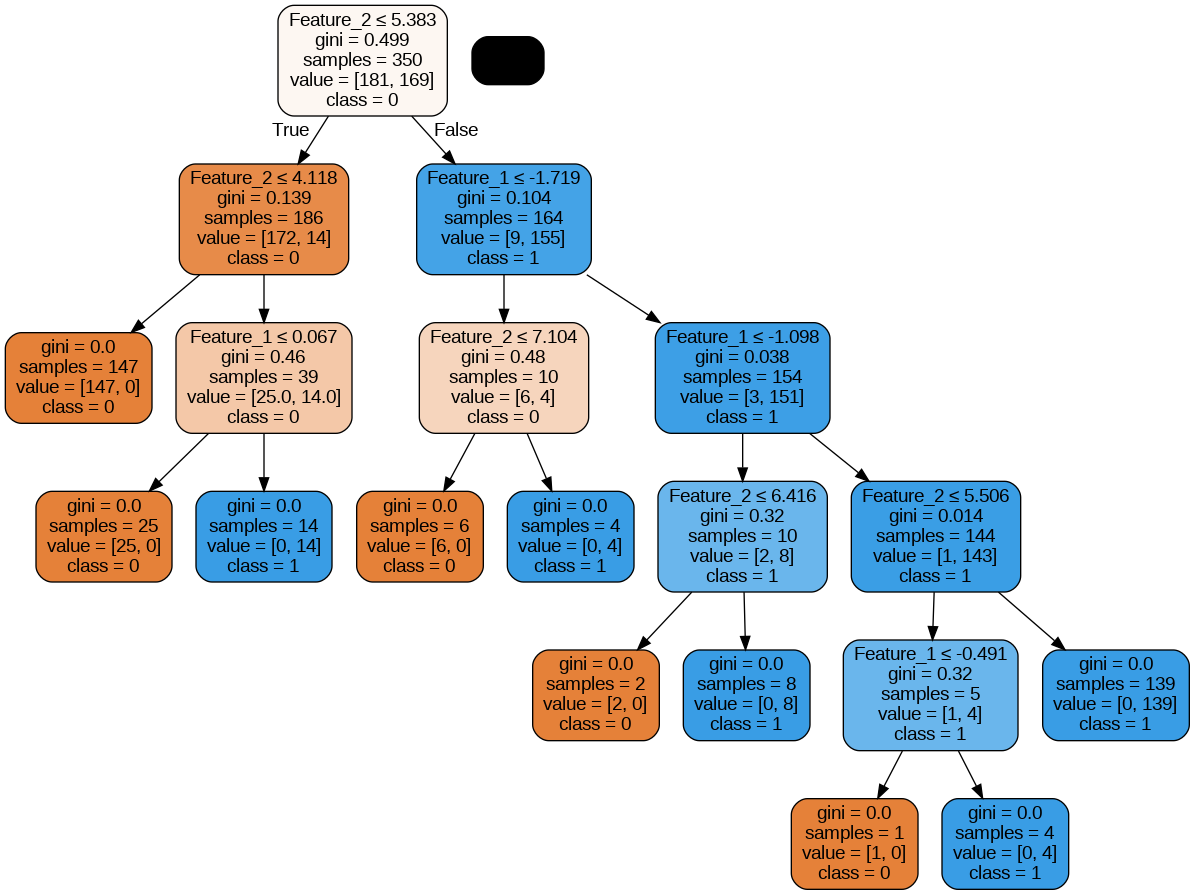

In [16]:
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

We see above it did a pretty good job

Below we'll use the second label.

In [17]:
feature_cols = ['Feature_1','Feature_2','Feature_3','Feature_4','Feature_5','Feature_6','Feature_7']
X = df[feature_cols] # Features
y = df['Label1'] # Target variable
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [21]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(random_state=1)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.88


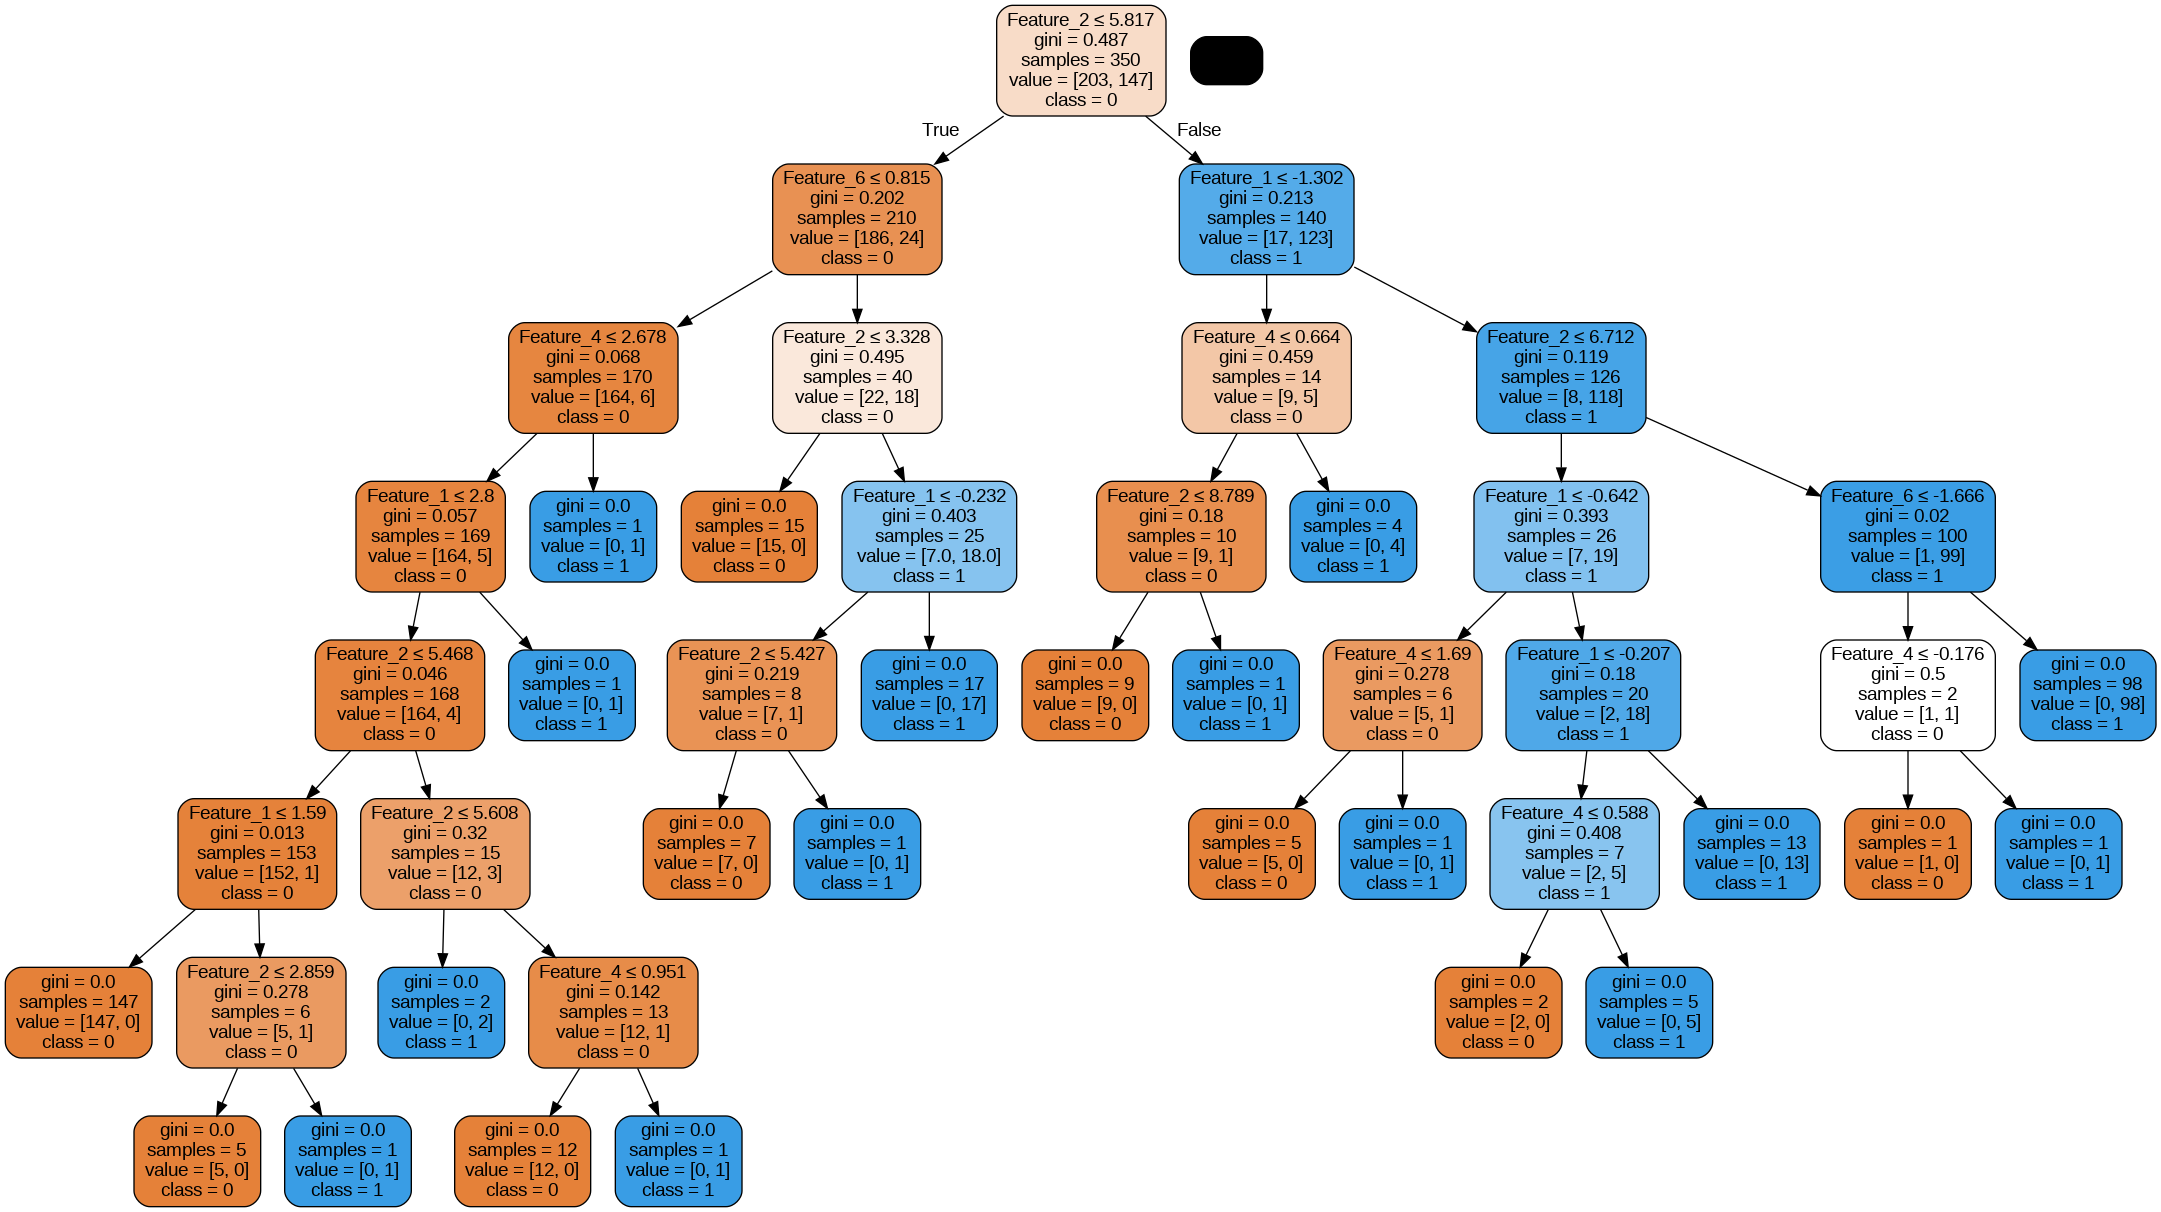

In [22]:
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

In [23]:
df['Label2']=(df['Feature_1']*df['Feature_2']+df['Feature_4']*df['Feature_6']+df['Feature_7']>2.5).astype(int)
X = df[feature_cols] # Features
y = df['Label2'] # Target variable
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [24]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(random_state=1)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.86


In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9533333333333334


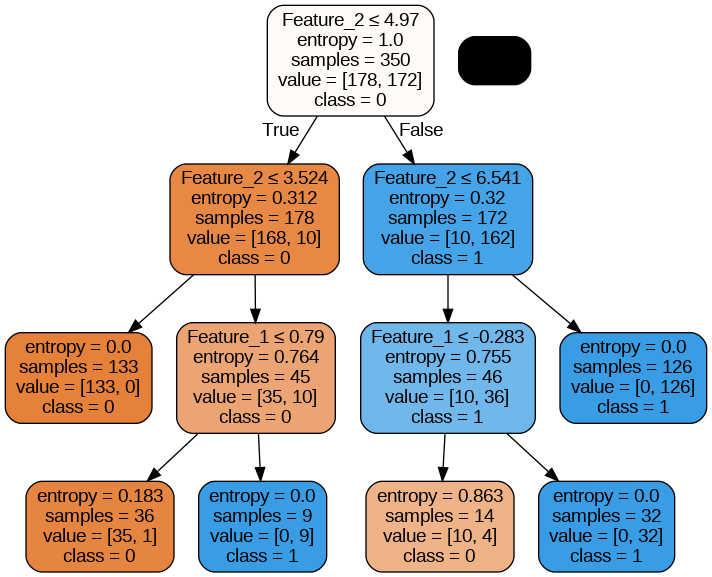

In [ ]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

## Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

In [26]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [27]:
y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9


In [28]:
# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

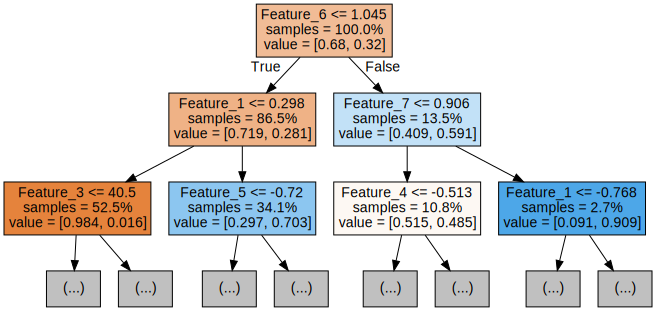

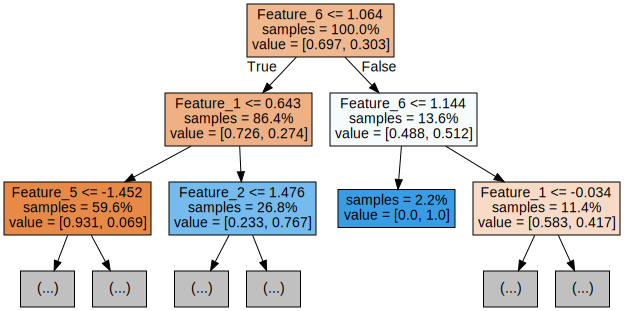

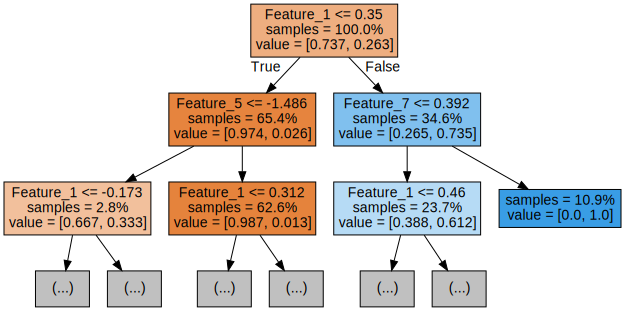

In [29]:
for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)



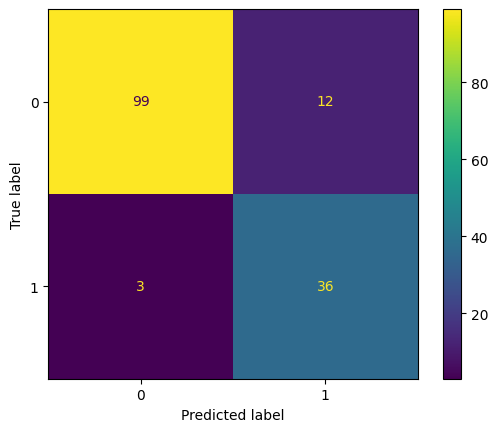

In [30]:
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();